<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

### 1) 타겟으로 사용할 특성을 선택합니다.
**(Urclass Quiz)** 여러분들이 프로젝트에 사용할 데이터셋과 타겟특성에 대해 아래의 내용을 포함하여 간략하게 설명해주세요. 
* `df.dtypes`을 사용해서 타겟특성의 데이터 타입 확인
* `df.describe()`를 사용해서 타겟특성의 대표값 확인(실수-평균, 범주형-최빈값)

In [21]:
### 이곳에서 과제를 진행해 주세요 ### 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/URCLASS/Gold_Daily .csv')

In [4]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol          object
Change %    float64
dtype: object

In [5]:
df.describe()

,Price,Open,High,Low,Change %
count,6886.000000,6886.000000,6886.000000,6886.000000,6886.000000
mean,909.824807,906.941624,910.127604,903.469021,0.000309
std,541.516040,539.071470,541.323158,536.564722,0.012892
min,253.000000,252.900000,252.900000,252.500000,-0.111300
25%,376.400000,376.200000,376.700000,375.800000,-0.004500
50%,890.900000,889.800000,899.700000,883.350000,0.000200
75%,1359.375000,1349.925000,1352.275000,1347.700000,0.005400
max,2115.200000,2121.700000,2121.700000,2121.700000,0.127100


### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
**(Urclass Quiz)** 다이아몬드를 보관하기 위해 금고를 만들었습니다. 금고가 너무 작아서 가격이 상위 25%인 것만 보관하려고 합니다. 이를 위해 'price' 특성을 이용해 금고에 보관할 다이아몬드와 그렇지 않은 것으로 분류하는 이진분류 컬럼을 만들어 타겟 특성으로 사용할 것입니다. 타겟 특성의 최빈값의 빈도수를 적어주세요.
- 'top25'라는 새로운 타겟변수(컬럼)를 만들어주세요.
- 상위 25% 이상 True, 상위 25% 미만 False

   

In [6]:
### 이곳에서 과제를 진행해 주세요 ### 
diamonds = sns.load_dataset('diamonds')

In [7]:
diamonds.shape

(53940, 10)

In [8]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [10]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

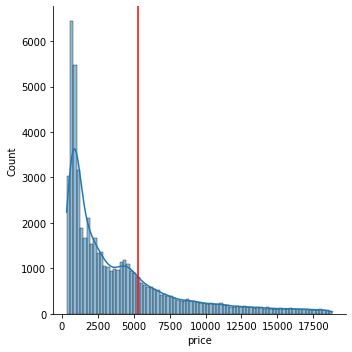

In [11]:
sns.displot(diamonds['price'],kde=True);
plt.axvline(5324.25, color='red');

In [12]:
# price를 이진타입으로 변형시켜 분류문제로 바꿈
# top25 라는 특성을 만들어 이진분류문제로 변환
diamonds['top25'] = diamonds['price'] >= 5324.25
diamonds['top25'].nunique()

2

In [13]:
diamonds['top25'].value_counts()

# URCLASS 2번 문제 : 최빈 클래스의 빈도수 40455

False    40455
True     13485
Name: top25, dtype: int64

In [ ]:
# 타겟변수의 분포 확인 : right skewed로 확인
target = diamonds['price']

sns.displot(target);

In [ ]:
# 타겟이 right-skewed 상태이기 때문에 로그변환 사용. 비대칭 분표형태를 정규분포형태로 변환시켜준다.

plots = pd.DataFrame()
plots['original'] = target
plots['transformed'] = np.log1p(target)
plots['backToOriginal'] = np.expm1(np.log1p(target))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backToOriginal'], ax=ax[2]);

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.

---


**(Urclass Quiz)** 여러분들이 프로젝트에 사용할 데이터의 기준모델과 사용할 평가지표를 제출해주세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 


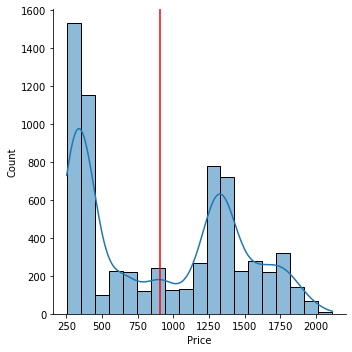

In [15]:
sns.displot(df['Price'],kde=True);
plt.axvline(909, color='red');

## 🔥 도전과제(Github - Discussion)

### 4) 실무에서 데이터분석가/데이터엔지니어/데이터사이언티스트에게 중요한 역량이 무엇이라고 생각하며, 어떤 어려움을 겪게 될 것 같은지와 어떤 능력이 필요할 지 논의해 보세요. 또한, 섹션2 프로젝트에 앞서 본인이 얻고자 하는 점이나 다짐 등을 서로 공유해 보세요. 


In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 